# Претпроцесирање на податочното множество

Пополнување на missing values, кодирање на категорични атрибути, трансформација на атрибути

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("../data/merged.csv")
data = data.drop(["Unnamed: 0"],axis=1)
print("Number of records = " + str(data.shape[0]))
print("Number of features = " + str(data.shape[1]))
data.head()

Number of records = 378
Number of features = 55


,Brand,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,...,Light Sensor,Compass Sensor,Proximity Sensor,Magnetic Sensor,Gravity Sensor,Heathtracking Sensor,Gyroscope Sensor,Accelerometar Sensor,Vibration Sensor,Laser Sensor
0,Oppo,4000,6.53,Yes,128,Yes,Yes,Yes,No,No,...,1,1,1,0,0,0,1,1,0,0
1,Apple,1960,4.70,Yes,32,Yes,No,Yes,No,Yes,...,1,1,1,0,0,0,1,1,0,0
2,Apple,1960,4.70,Yes,32,Yes,No,Yes,No,Yes,...,1,1,1,0,0,0,1,1,0,0
3,Apple,1715,4.70,Yes,16,Yes,No,Yes,No,Yes,...,1,1,1,0,0,0,1,1,0,0
4,Apple,1715,4.70,Yes,16,Yes,No,Yes,No,Yes,...,1,1,1,0,0,0,1,1,0,0


### Пополнување на missing values

In [3]:
data.isna().sum()

Brand                      0
Battery capacity           4
Screen Size                0
Touchscreen                0
Internal storage           0
Headphones                 0
Face unlock                0
Fingerprint sensor         0
Wireless charging          0
NFC                        0
Number of SIMs             0
SIM Type                   0
4G/ LTE                    0
5G                         0
Expandable storage         0
Price                      0
3G                         0
EDGE                       0
GPRS                       0
Wi-Fi                      0
VoLTE                      0
Usb Type                  25
Bluetooth                  0
OS                         0
cpuCores                   0
Chipset                    0
CPU                        0
GPS                        0
RAM                        0
FM Radio                   0
Rear Camera                0
Flash                      0
Front Camera               0
PPI                        0
Width         

Потребно е да пополниме податоци за капацитетот на батеријата, висина, ширина, тежина и USB порта. За да го откриеме најдобриот начин за пополнување најпрво ќе ги разгледаме дистрибуциите на секој од атрибутите посебно

In [4]:
for index, row in data.iterrows():
    if row['Battery capacity'] == row['Battery capacity']:
        data.loc[index,'Battery capacity']=row['Battery capacity'].replace(",","")

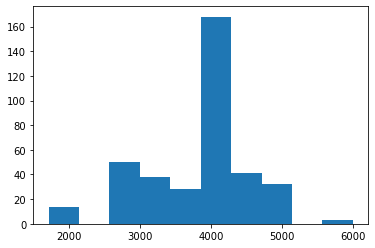

In [5]:
bat_cap_series = data[data['Battery capacity']==data['Battery capacity']]['Battery capacity'].astype(str).astype(int)
plt.hist(bat_cap_series)
plt.show()

In [6]:
data['Battery capacity'].fillna(data['Battery capacity'].mode()[0], inplace=True)
data['Battery capacity'] = data['Battery capacity'].astype(int)

Како што можеме да видиме повеќе од пола записи во нашето множество имаат иста вредност за капацитет на батерија, па овие missing values ќе ги пополниме со модата

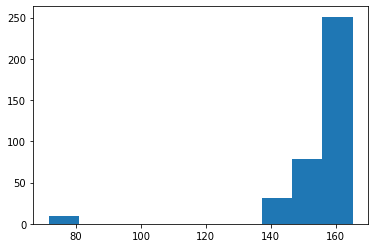

In [7]:
height_series = data[data['Height']==data['Height']]['Height']
plt.hist(height_series)
plt.show()

In [8]:
data['Height'].fillna(data['Height'].mode()[0], inplace=True)

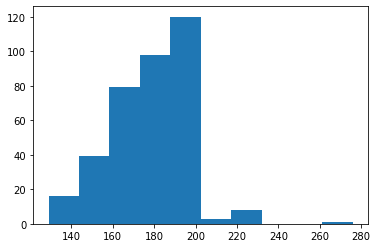

In [9]:
weight_series = data[data['Weight']==data['Weight']]['Weight']
plt.hist(weight_series)
plt.show()

In [10]:
data['Weight'].fillna(data['Weight'].mode()[0], inplace=True)

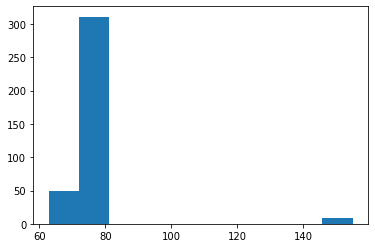

In [11]:
width_series = data[data['Width']==data['Width']]['Width']
plt.hist(width_series)
plt.show()

In [12]:
data['Width'].fillna(data['Width'].mode()[0], inplace=True)

Слично како и капацитетот на батерија, така и преостанатите нумерички вредности (висина, ширина и тежина) ќе ги пополниме со модата

In [13]:
print(data[data["Usb Type"]==data["Usb Type"]]["Usb Type"].value_counts())

microUSB       172
USB-C          152
Proprietary     29
Name: Usb Type, dtype: int64


In [14]:
print(data[data["Usb Type"]!=data["Usb Type"]]["Brand"].value_counts())

Apple       19
Micromax     3
Motorola     2
Xiaomi       1
Name: Brand, dtype: int64


In [15]:
print(data[data['Brand']=="Apple"]["Usb Type"].value_counts())
print(data[data['Brand']=="Micromax"]["Usb Type"].value_counts())
print(data[data['Brand']=="Motorola"]["Usb Type"])
# немаме информации за ниту еден моторола телефон со позната usb порта па ќе замениме со најчестатa
print(data[data['Brand']=="Xiaomi"]["Usb Type"].value_counts())

Proprietary    29
USB-C           1
Name: Usb Type, dtype: int64
microUSB    2
Name: Usb Type, dtype: int64
373    NaN
374    NaN
Name: Usb Type, dtype: object
USB-C       50
microUSB    33
Name: Usb Type, dtype: int64


In [16]:
brand_usb_d = {"Apple":"Proprietary","Micromax":"microUSB","Motorola":"microUSB", "Xiaomi":"USB-C","Realme":"microUSB"}

In [17]:
for index, row in data.iterrows():
    if row['Usb Type'] != row['Usb Type']:
        data.loc[index,'Usb Type']=brand_usb_d[row['Brand']]

За USBто наместо да ја разгледаме само дистрибуцијата на вредностите на овој атрибут, ние користејќи претхосно познавање знаеме дека USB портата зависи од произведувачот, па поради тоа вредностите ги пополнивме со најчестата USB вредност на телефонит кои се произведени од истиот произведувач

### Кодирање на категориски атрибути

1) Boolean категориски атрибути

In [18]:
data['Touchscreen'] = pd.Series(np.where(data['Touchscreen'] == 'Yes', 1, 0),data.index)
data['Headphones'] = pd.Series(np.where(data['Headphones'] == 'Yes', 1, 0),data.index)
data['Face unlock'] = pd.Series(np.where(data['Face unlock'] == 'Yes', 1, 0),data.index)
data['Fingerprint sensor'] = pd.Series(np.where(data['Fingerprint sensor'] == 'Yes', 1, 0),data.index)
data['Wireless charging'] = pd.Series(np.where(data['Wireless charging'] == 'Yes', 1, 0),data.index)
data['NFC'] = pd.Series(np.where(data['NFC'] == 'Yes', 1, 0),data.index)
data['4G/ LTE'] = pd.Series(np.where(data['4G/ LTE'] == 'Yes', 1, 0),data.index)
data['3G'] = pd.Series(np.where(data['3G'] == 'Yes', 1, 0),data.index)
data['EDGE'] = pd.Series(np.where(data['EDGE'] == 'Yes', 1, 0),data.index)
data['VoLTE'] = pd.Series(np.where(data['VoLTE'] == 'Yes', 1, 0),data.index)
data['GPRS'] = pd.Series(np.where(data['GPRS'] == 'Yes', 1, 0),data.index)
data['Bluetooth'] = pd.Series(np.where(data['Bluetooth'] == 'Yes', 1, 0),data.index)
data['GPS'] = pd.Series(np.where(data['GPS'] == 'Yes', 1, 0),data.index)
data['FM Radio'] = pd.Series(np.where(data['FM Radio'] == 'Yes', 1, 0),data.index)
data['Fast Charging'] = pd.Series(np.where(data['Fast Charging'] == 'Yes', 1, 0),data.index)
data['Removable Battery'] = pd.Series(np.where(data['Removable Battery'] == 'Yes', 1, 0),data.index)
data['Card Slot'] = pd.Series(np.where(data['Card Slot'] == 'Yes', 1, 0),data.index)
data['5G'] = pd.Series(np.where(data['5G'] == 'Yes', 1, 0),data.index)
data['Wi-Fi'] = pd.Series(np.where(data['Wi-Fi'] == 'Yes', 1, 0),data.index)

2) Категорични атрибути со повеќе вредности 

In [19]:
data['Expandable storage'] = data['Expandable storage'].astype(int)
data["SIM Type"] = data["SIM Type"].astype('category')
data["OS"] = data["OS"].astype('category')
data["cpuCores"] = data["cpuCores"].astype('category')
data["Chipset"] = data["Chipset"].astype('category')
data["Flash"] = data["Flash"].astype('category')
data["Launched_Month"] = data["Launched_Month"].astype('category')
data["Launched_Year"] = data["Launched_Year"].astype('category')
data["Usb Type"] = data["Usb Type"].astype('category')

In [20]:
data["SIM Type"] = data["SIM Type"].cat.codes
data["OS"] = data["OS"].cat.codes
data["cpuCores"] = data["cpuCores"].cat.codes
data["Chipset"] = data["Chipset"].cat.codes
data["Flash"] = data["Flash"].cat.codes
data["Launched_Month"] = data["Launched_Month"].cat.codes
data["Launched_Year"] = data["Launched_Year"].cat.codes
data["Usb Type"] = data["Usb Type"].cat.codes

3) One-hot encoding на атрибутот Brand 

Поради тоа што истото множество ќе се користи во повеќе регресиони и клсификациони проблеми освен one-hot енкодирање оставаме атрибут кој е само едноставно кодиран ("Manufacturer")

In [21]:
data["Manufacturer"]=data["Brand"]
data["Manufacturer"] = data["Manufacturer"].astype('category')
data["Manufacturer"] = data["Manufacturer"].cat.codes
data = pd.get_dummies(data, columns=["Brand"], prefix=["Brand_"])

In [22]:
data.head()

,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Brand__Micromax,Brand__Motorola,Brand__Nokia,Brand__OnePlus,Brand__Oppo,Brand__Realme,Brand__Samsung,Brand__Tecno,Brand__Vivo,Brand__Xiaomi
0,4000,6.53,1,128,1,1,1,0,0,2.0,...,0,0,0,0,1,0,0,0,0,0
1,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0


### Трансформација на атрибут 

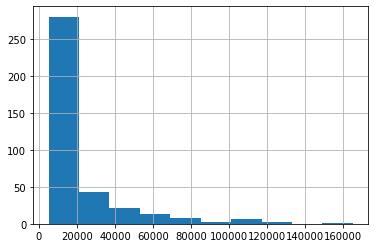

In [23]:
data['Price'].hist()
plt.show()

За подобрување на перформансите на регресионите модели направени во однос на ова множество додаваме и атрибут кој претставува логаритамска трансформација на атрибутот цена

In [24]:
data['logPrice'] = np.log(data['Price'])

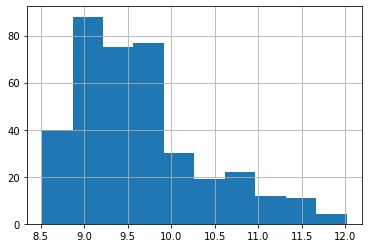

In [25]:
data['logPrice'].hist()
plt.show()

In [26]:
data.head()

,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Brand__Motorola,Brand__Nokia,Brand__OnePlus,Brand__Oppo,Brand__Realme,Brand__Samsung,Brand__Tecno,Brand__Vivo,Brand__Xiaomi,logPrice
0,4000,6.53,1,128,1,1,1,0,0,2.0,...,0,0,0,1,0,0,0,0,0,10.085392
1,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.221905
2,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,9.897972
3,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.645401
4,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.064671


In [27]:
data.to_csv("../data/data.csv")